# Sentimental analysis of Federeal Reserve FOMC meeting minutes using FinBert

## Install FedTools and transformers packages

In [ ]:
! pip install FedTools
! pip install transformers
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.0 MB/s eta 0:00:00


## Import packages

In [ ]:
from FedTools import MonetaryPolicyCommittee
from FedTools import BeigeBooks
from FedTools import FederalReserveMins
import transformers
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import pandas as pd
import numpy as np
from nltk import tokenize
import nltk
nltk.download('punkt')
from datetime import date
import time
import yfinance as yf
import matplotlib.pylab as plt
import matplotlib.dates as mdates
%matplotlib inline
from datetime import datetime
from pytz import timezone, utc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Web Scrap Federal Reserve Open Market Committee Meeting minutes

In [ ]:
# Define the detail of scrapping
fed_mins = FederalReserveMins(
            main_url = 'https://www.federalreserve.gov',
            calendar_url ='https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm',
            start_year = 2003,
            historical_split = 2017,
            verbose = True,
            thread_num = 10)

# Put the scrapped result to a DataFrame
dataset = fed_mins.find_minutes()

Constructing links between 2003 and 2023
Extracting Federal Reserve Minutes.
Retrieving articles.
.........................................................................................................................................................................

## Define the natual language processing detail of FinBert

In [ ]:
# Import the pretrained classifer and tokenizer of Bert from FinBert online source
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

# Build up the NLP pipeline with the pretrained classifer model and tokenizer from above
nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

## Divide the dataset into 3 different dataset for easier processing

In [ ]:
dataset0313 = dataset[dataset.index < '2014-01-01']
dataset1422 = dataset[(dataset.index > '2013-12-31')&(dataset.index < '2022-12-31')]
dataset2323 = dataset[dataset.index >= '2023-01-01']

## Calculate the positiveness of the meeting minutes
Use nlp setting from above to interate through each sentences of every meeting minutes.
<br> Calculate "(no. of positive sentences - no. of negative sentences)/total number of sentences in a minute" for each minutes <br>
CSV file of positiveness between 2003 to 2022 is provided in github.

### Optional: Calculation of positiveness of 2003 to 2022 (CSV file can be found in Github)

In [ ]:
date_list = dataset0313.index.tolist()
data_positiveness0313 = dataset0313
for date in date_list:
    sentence_list = tokenize.sent_tokenize(dataset.loc[date,'Federal_Reserve_Mins'])
    positive_sent=0
    sentence_list=[sent for sent in sentence_list if len(sent) <= 500]
    for sentence in sentence_list:
        nlp_result = pd.DataFrame(nlp(sentence))
        positive_sent += 1 if nlp_result.loc[0,"label"] == "Positive" else -1 if nlp_result.loc[0,"label"] == "Negative" else 0
    positiveness = positive_sent/len(sentence_list)
    data_positiveness0313.loc[date,"positiveness"]=positiveness
data_positiveness0313.to_csv("positiveness0313.csv")
data_positiveness0313

<ipython-input-6-42a00cdfbe5e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_positiveness0313.loc[date,"positiveness"]=positiveness


,Federal_Reserve_Mins,positiveness
2003-01-29,"The Federal Reserve, the central bank of the U...",0.045643
2003-03-18,A meeting of the Federal Open Market Committee...,-0.174863
2003-05-06,A meeting of the Federal Open Market Committee...,-0.250891
2003-06-25,A meeting of the Federal Open Market Committee...,-0.092429
2003-08-12,A meeting of the Federal Open Market Committee...,-0.042229
...,...,...
2013-06-19,"The Federal Reserve, the central bank of the U...",-0.113725
2013-07-31,"The Federal Reserve, the central bank of the U...",-0.031963
2013-09-18,"The Federal Reserve, the central bank of the U...",-0.205000
2013-10-30,"The Federal Reserve, the central bank of the U...",-0.109649


In [ ]:
date_list = dataset1422.index.tolist()
data_positiveness1422 = dataset1422
for date in date_list:
    sentence_list = tokenize.sent_tokenize(dataset.loc[date,'Federal_Reserve_Mins'])
    positive_sent=0
    sentence_list=[sent for sent in sentence_list if len(sent) <= 500]
    for sentence in sentence_list:
        nlp_result = pd.DataFrame(nlp(sentence))
        positive_sent += 1 if nlp_result.loc[0,"label"] == "Positive" else -1 if nlp_result.loc[0,"label"] == "Negative" else 0
    positiveness = positive_sent/len(sentence_list)
    data_positiveness1422.loc[date,"positiveness"]=positiveness
data_positiveness1422.to_csv("positiveness1422.csv")
data_positiveness1422

<ipython-input-7-b86078211d2f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_positiveness1422.loc[date,"positiveness"]=positiveness


,Federal_Reserve_Mins,positiveness
2014-01-29,"The Federal Reserve, the central bank of the U...",0.013812
2014-03-19,"The Federal Reserve, the central bank of the U...",-0.123506
2014-04-30,"The Federal Reserve, the central bank of the U...",-0.042105
2014-06-18,"The Federal Reserve, the central bank of the U...",-0.004292
2014-07-30,"The Federal Reserve, the central bank of the U...",0.000000
...,...,...
2022-06-15,"The Federal Reserve, the central bank of the U...",-0.147727
2022-07-27,"The Federal Reserve, the central bank of the U...",-0.236934
2022-09-21,"The Federal Reserve, the central bank of the U...",-0.147410
2022-11-02,"The Federal Reserve, the central bank of the U...",-0.133588


### Calculation of positiveness of 2023

In [ ]:
date_list = dataset2323.index.tolist()
data_positiveness2323 = dataset2323
for date in date_list:
    sentence_list = tokenize.sent_tokenize(dataset.loc[date,'Federal_Reserve_Mins'])
    positive_sent=0
    sentence_list=[sent for sent in sentence_list if len(sent) <= 500]
    for sentence in sentence_list:
        nlp_result = pd.DataFrame(nlp(sentence))
        positive_sent += 1 if nlp_result.loc[0,"label"] == "Positive" else -1 if nlp_result.loc[0,"label"] == "Negative" else 0
    positiveness = positive_sent/len(sentence_list)
    data_positiveness2323.loc[date,"positiveness"]=positiveness

data_positiveness2323

<ipython-input-25-ee65d518e8cc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_positiveness2323.loc[date,"positiveness"]=positiveness


,Federal_Reserve_Mins,positiveness
2023-02-01,"The Federal Reserve, the central bank of the U...",-0.170370
2023-03-22,"The Federal Reserve, the central bank of the U...",-0.102362
2023-05-03,"The Federal Reserve, the central bank of the U...",-0.202166
2023-06-14,"The Federal Reserve, the central bank of the U...",-0.041322
2023-07-26,"The Federal Reserve, the central bank of the U...",-0.046414
2023-09-20,"The Federal Reserve, the central bank of the U...",-0.043860


## Import the dataset from csv
**Caution: Please first upload the 2 csv file in this notebook! <br>**
It took too long the do the nlp for every meeting minutes, therefore the result is previously downloaded and reupload now.

In [ ]:
data_positiveness0313=pd.read_csv("positiveness0313.csv", index_col=0)
data_positiveness1422=pd.read_csv("positiveness1422.csv", index_col=0)

#Combine all three subset
data_positiveness=pd.concat([data_positiveness0313, data_positiveness1422], ignore_index=False)
data_positiveness.index = pd.to_datetime(data_positiveness.index)
data_positiveness=pd.concat([data_positiveness, data_positiveness2323], ignore_index=False)
data_positiveness.index = pd.to_datetime(data_positiveness.index)
data_positiveness

,Federal_Reserve_Mins,positiveness
2003-01-29,"The Federal Reserve, the central bank of the U...",0.045643
2003-03-18,A meeting of the Federal Open Market Committee...,-0.174863
2003-05-06,A meeting of the Federal Open Market Committee...,-0.250891
2003-06-25,A meeting of the Federal Open Market Committee...,-0.092429
2003-08-12,A meeting of the Federal Open Market Committee...,-0.042229
...,...,...
2023-03-22,"The Federal Reserve, the central bank of the U...",-0.102362
2023-05-03,"The Federal Reserve, the central bank of the U...",-0.202166
2023-06-14,"The Federal Reserve, the central bank of the U...",-0.041322
2023-07-26,"The Federal Reserve, the central bank of the U...",-0.046414


## Get the history of S&P 500 etf(ticker = SPY):

In [ ]:
date = datetime.now(tz=utc)
today = date.astimezone(timezone('US/Pacific'))
today_date = today.strftime("%Y-%m-%d")

# Set up the date range of history price
start_date = "2003-01-01"
end_date = today_date

# Retrieve
ticker = "^GSPC"
yfdata=yf.download(ticker,start_date,end_date)
SP500_df = yfdata[["Close"]]
SP500_df = SP500_df.reset_index()

# Prepare a column of growth removed "Close"
SP500_df['row_num'] = SP500_df.index
multi_factor = (SP500_df.iloc[-1]['Close'] / SP500_df.iloc[0]['Close']) ** (1 / len(SP500_df))
SP500_df['Untrended_Close']=SP500_df['Close']*(1/(multi_factor**SP500_df['row_num']))

# Prepare column of 6 month reutrn, 1 year return and 2 year return
SP500_df['6m_return']=(SP500_df['Close'].shift(-126)-SP500_df['Close'])/SP500_df['Close']
SP500_df['1y_return']=(SP500_df['Close'].shift(-252)-SP500_df['Close'])/SP500_df['Close'] # 1year is approximately have 252 trading days
SP500_df['2y_return']=(SP500_df['Close'].shift(-504)-SP500_df['Close'])/SP500_df['Close']
SP500_df['3y_return']=(SP500_df['Close'].shift(-756)-SP500_df['Close'])/SP500_df['Close']
# Make Date as index
SP500_df = SP500_df.set_index(SP500_df.columns[0])

SP500_df

[*********************100%%**********************]  1 of 1 completed


,Close,row_num,Untrended_Close,6m_return,1y_return,2y_return,3y_return
Date,,,,,,,
2003-01-02,909.030029,0,909.030029,0.084343,0.219410,0.322377,0.395774
2003-01-03,908.590027,1,908.328235,0.105471,0.235122,0.307575,0.401578
2003-01-06,929.010010,2,928.474737,0.084854,0.209535,0.274195,0.370793
2003-01-07,922.929993,3,922.132453,0.085900,0.220385,0.287086,0.392792
2003-01-08,909.929993,4,908.881736,0.086567,0.243964,0.303606,0.417856
...,...,...,...,...,...,...,...
2023-10-23,4217.040039,5237,932.377536,NaN,NaN,NaN,NaN
2023-10-24,4247.680176,5238,938.881400,NaN,NaN,NaN,NaN
2023-10-25,4186.770020,5239,925.151550,NaN,NaN,NaN,NaN


## Visualization of sentiment of FOMC meeting

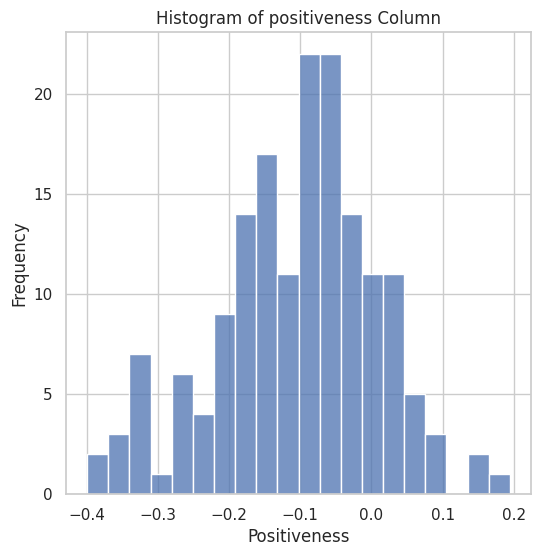

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
# Setting the style for seaborn for the plot
sns.set(style="whitegrid")

# Creating a histogram
sns.histplot(data_positiveness['positiveness'], bins=20, kde=False)

# Giving the histogram a title
plt.title('Histogram of positiveness Column')

# Providing labels
plt.xlabel('Positiveness')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

## Does the sentiment of the meeting minutes correlated with the market?

### Plot of SP500 and sentiment

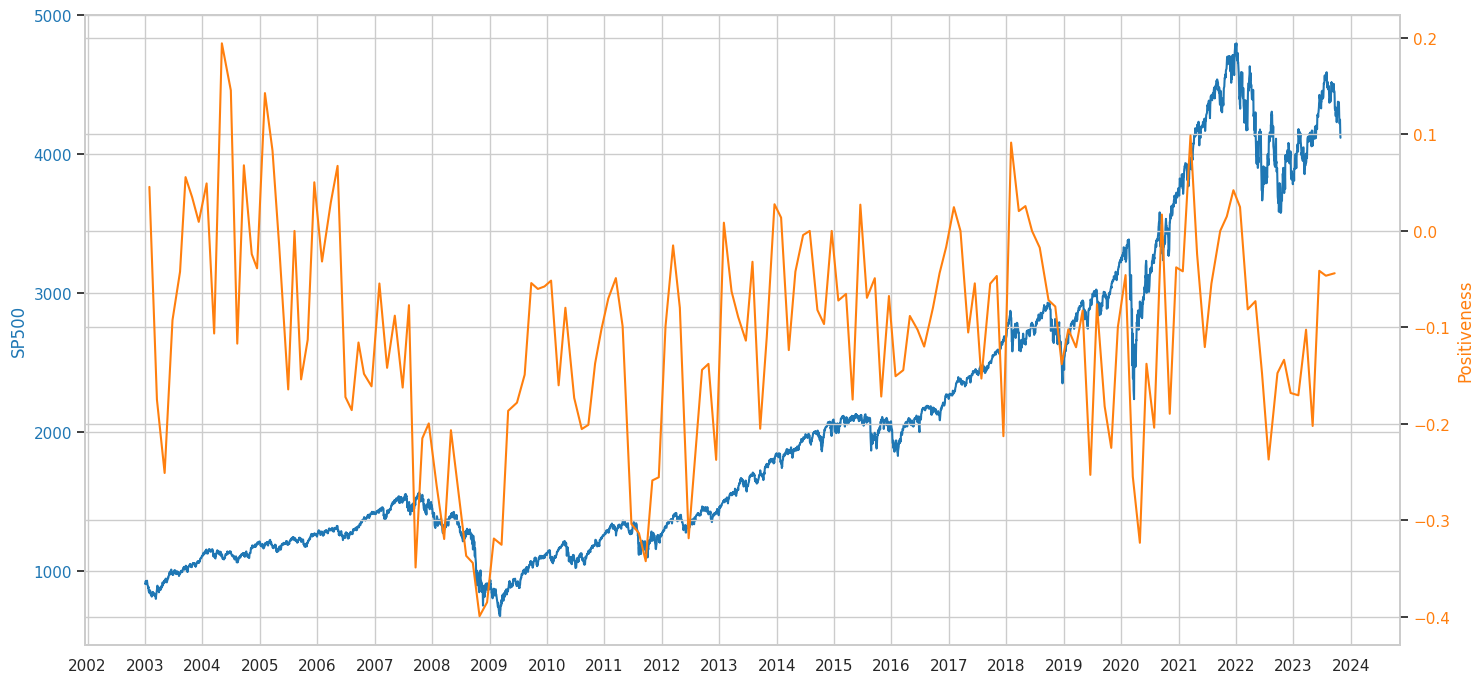

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:blue'
# we already handled the x-label with ax1
ax1.set_ylabel('SP500', color=color)
ax1.plot(SP500_df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
# we already handled the x-label with ax1
ax2.set_ylabel('Positiveness', color=color)
ax2.plot(data_positiveness["positiveness"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

### Plot of sentiment and S&P500(removed growth)

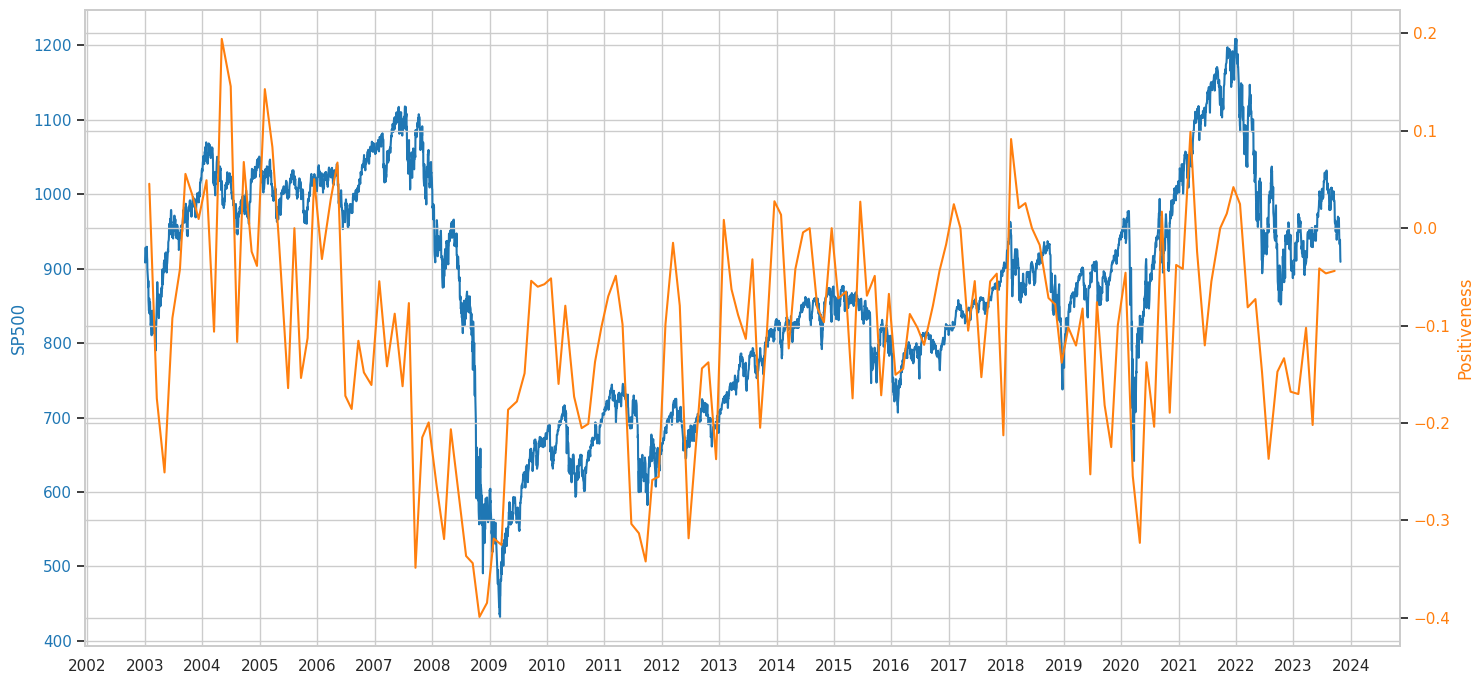

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:blue'
# we already handled the x-label with ax1
ax1.set_ylabel('SP500', color=color)
ax1.plot(SP500_df['Untrended_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
# we already handled the x-label with ax1
ax2.set_ylabel('Positiveness', color=color)
ax2.plot(data_positiveness["positiveness"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

## Scatter plot of 6 month return and positiveness

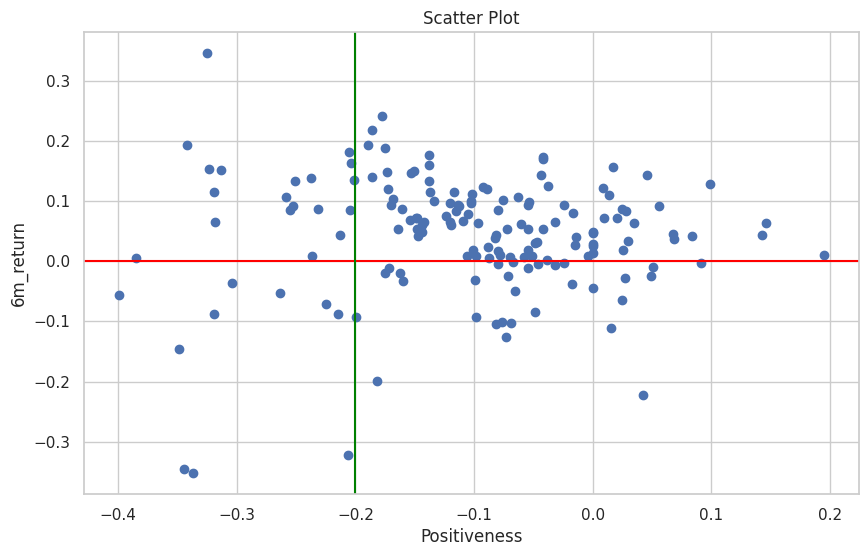

In [ ]:
# Subset data_positiveness
data_positiveness_subset = data_positiveness[data_positiveness.index.isin(SP500_df.index)]

# Subset SP500_df
SP500_df_subset = SP500_df[SP500_df.index.isin(data_positiveness.index)]

# Now both DataFrames are subsetted to contain the same indices

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_positiveness_subset["positiveness"], SP500_df_subset["6m_return"])
plt.axhline(0, color='red')
plt.axvline(-0.2, color='green')
plt.xlabel('Positiveness')
plt.ylabel('6m_return')
plt.title('Scatter Plot')
plt.show()

In [ ]:
combine_6M = SP500_df_subset.join(data_positiveness_subset)
negative_6M = combine_6M[combine_6M["positiveness"] <= -0.2]
ER_6M = negative_6M["6m_return"].mean()
SD_6M = negative_6M["6m_return"].std()
SP500_df_clean = SP500_df.dropna()
regER_6M=SP500_df_clean["6m_return"].mean()
regSD_6M=SP500_df_clean["6m_return"].std()
count_pos_negative_6M = (negative_6M["6m_return"] >= 0).sum()
count_neg_negative_6M = (negative_6M["6m_return"] < 0).sum()
count_pos_combine_6M = (combine_6M["6m_return"] >= 0).sum()
count_neg_combine_6M = (combine_6M["6m_return"] < 0).sum()
prob_negative_6M = count_pos_negative_6M/(count_pos_negative_6M+count_neg_negative_6M)
prob_combine_6M = count_pos_combine_6M/(count_pos_combine_6M+count_neg_combine_6M)
correlation_6M = combine_6M["6m_return"].corr(combine_6M["positiveness"])
print(f"The expected return of investing 6M when FOMC have bad sentiment is {ER_6M}")
print(f"Regular expected return of investing 6M is {regER_6M}")
print(f"The standard deviation of investing 6M when FOMC have bad sentiment is {SD_6M}")
print(f"Regular standard deviation of return in investing 6M is {regSD_6M}")
print(f"The probability of getting a positive 6M return when FOMC have bad sentiment is {prob_negative_6M}")
print(f"Regular probability of getting a positive 6M return is {prob_combine_6M}")



The expected return of investing 6M when FOMC have bad sentiment is 0.025244538149620195
Regular expected return of investing 6M is 0.0475644418641319
The standard deviation of investing 6M when FOMC have bad sentiment is 0.1643242692599928
Regular standard deviation of return in investing 6M is 0.10810588018152265
The probability of getting a positive 6M return when FOMC have bad sentiment is 0.6551724137931034
Regular probability of getting a positive 6M return is 0.75
Correlation between positiveness and 6M return is 0.002536643493622834


## Scatter plot of 1 Year return and positiveness

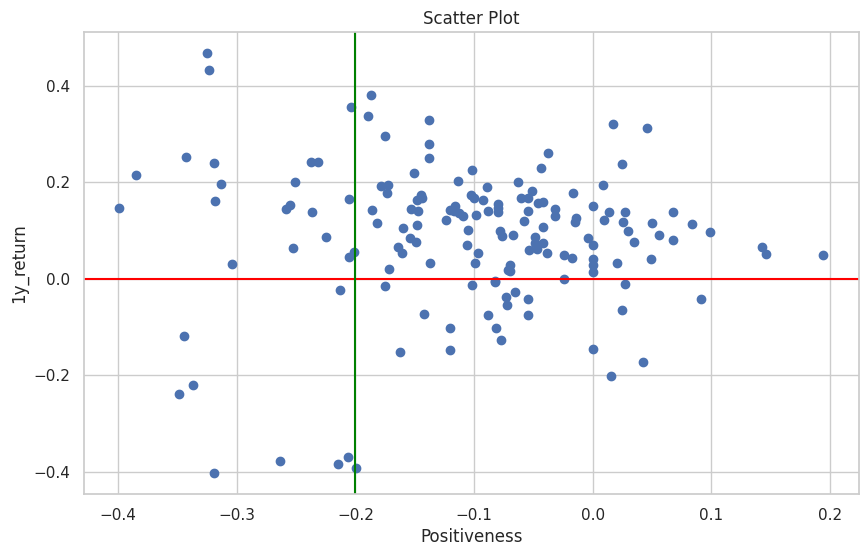

In [ ]:
# Subset data_positiveness
data_positiveness_subset = data_positiveness[data_positiveness.index.isin(SP500_df.index)]

# Subset SP500_df
SP500_df_subset = SP500_df[SP500_df.index.isin(data_positiveness_subset.index)]

# Now both DataFrames are subsetted to contain the same indices

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_positiveness_subset["positiveness"], SP500_df_subset["1y_return"])
plt.axhline(0, color='red')
plt.axvline(-0.2, color='green')
plt.xlabel('Positiveness')
plt.ylabel('1y_return')
plt.title('Scatter Plot')
plt.show()

In [ ]:
combine_1Y = SP500_df_subset.join(data_positiveness_subset)
negative_1Y = combine_1Y[combine_1Y["positiveness"] <= -0.2]
ER_1Y = negative_1Y["1y_return"].mean()
SD_1Y = negative_1Y["1y_return"].std()
SP500_df_clean = SP500_df.dropna()
regER_1Y=SP500_df_clean["1y_return"].mean()
regSD_1Y=SP500_df_clean["1y_return"].std()
count_pos_negative_1Y = (negative_1Y["1y_return"] >= 0).sum()
count_neg_negative_1Y = (negative_1Y["1y_return"] < 0).sum()
count_pos_combine_1Y = (combine_1Y["1y_return"] >= 0).sum()
count_neg_combine_1Y = (combine_1Y["1y_return"] < 0).sum()
prob_negative_1Y = count_pos_negative_1Y/(count_pos_negative_1Y+count_neg_negative_1Y)
prob_combine_1Y = count_pos_combine_1Y/(count_pos_combine_1Y+count_neg_combine_1Y)
print(f"The expected return of investing 6M when FOMC have bad sentiment is {ER_1Y}")
print(f"Regular expected return of investing 6M is {regER_1Y}")
print(f"The standard deviation of investing 6M when FOMC have bad sentiment is {SD_1Y}")
print(f"Regular standard deviation of return in investing 6M is {regSD_1Y}")
print(f"The probability of getting a positive 6M return when FOMC have bad sentiment is {prob_negative_1Y}")
print(f"Regular probability of getting a positive 6M return is {prob_combine_1Y}")

The expected return of investing 6M when FOMC have bad sentiment is 0.06547581206329994
Regular expected return of investing 6M is 0.0970890590307706
The standard deviation of investing 6M when FOMC have bad sentiment is 0.24176130624688946
Regular standard deviation of return in investing 6M is 0.1559701367517804
The probability of getting a positive 6M return when FOMC have bad sentiment is 0.7241379310344828
Regular probability of getting a positive 6M return is 0.8012820512820513


#Conclusion
Investor should stay away from the period that FOMC meetings show bad sentiment. The lower than regular expected return and higher than regular standard deviation under bad sentiment periods indicate that when the meeting show bad sentiment, investing is at higher risk and lower return.<br>
On the opposite, one way to take advantage from the result of this analysis is to invest in put option, as the low expected return and high standard deviation in S&P500 might indicate an opportunity to make a profit with put option.

##Reference
Yi, Y. (2020, June 10). FinBERT-tone. Retrieved July 5, 2023, from https://huggingface.co/yiyanghkust/finbert-tone. <br>
Huang, A., Wang, H., & Yang, Y. (2023). FinBERT: A Large Language Model for Extracting Information from Financial Text. Retrieved July 5, 2023, from https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3910214 <br>
FedTools. (20223). Retrieved July 5, 2023, from https://pypi.org/project/Fedtools/
